<a href="https://colab.research.google.com/github/Turtle-Grace/gracehuangtw/blob/main/0318_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise
Every year, the city of Munich updates a data set that shows visitor numbers, drinking mood and Hendl consumption.

https://opendata.muenchen.de/en/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Oktoberfest.csv")

### Task 1
Create **two different visualizations** and display them **side by side** using subplots. The goal is to analyze historical Oktoberfest data and explore possible relationships between key variables.

**Beer Price Development**  
- Create a **line plot** that shows how **beer prices** have changed over the years.  
- Make sure to label the axes and add a **title** to the plot.  

**Relationship Between Beer and Roasted Chicken Consumption**  
- Create a **scatter plot** that examines the relationship between **beer consumption and roasted chicken consumption**.  
- Add a **regression line** to highlight possible trends.  
- Ensure the axes are properly labeled and add a **title** to the plot.  

**Subplots**  
- Display both visualizations **side by side** using **subplots**.  
- Adjust the layout so that the figures are **well-proportioned and easy to read**.  


,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


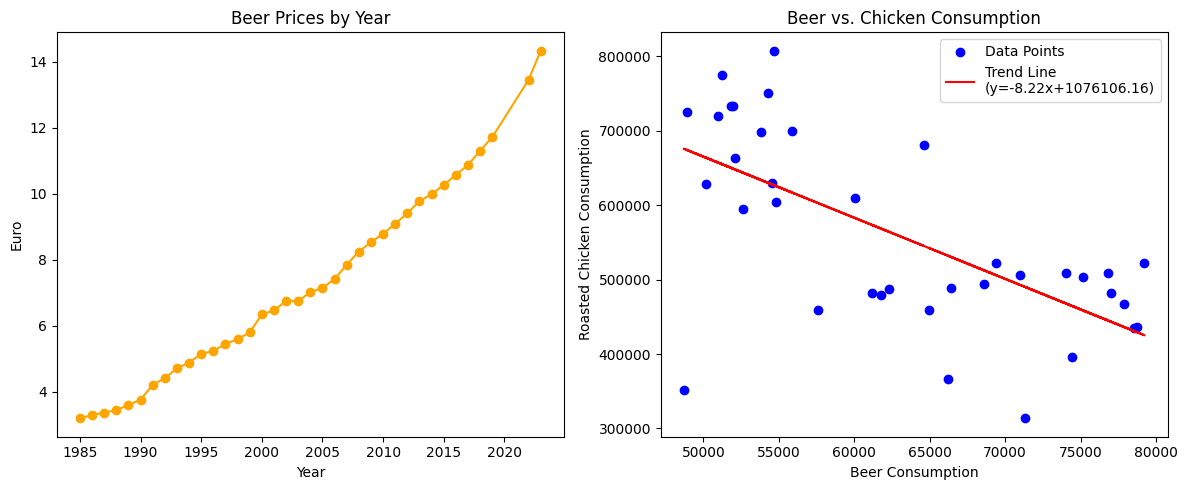

In [2]:
display(df.head())

#subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#1-1 Subplot 1: Line chart of Beer Prices by Year
axes[0].plot(df["jahr"], df["bier_preis"], marker="o", linestyle="-", color="orange")
axes[0].set_title("Beer Prices by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Euro")

#1-2 Subplot 2: Scatter Plot of Beer consumption and Roasted chicken consumption by Year
x = df["bier_konsum"]
y = df["hendl_konsum"]

axes[1].scatter(x, y, color="blue", label="Data Points")

#linear regression (slope m, intercept b) for the scatter
m, b = np.polyfit(x, y, 1)
axes[1].plot(x, m*x + b, color="red", label=f"Trend Line\n(y={m:.2f}x+{b:.2f})")

axes[1].set_xlabel("Beer Consumption")
axes[1].set_ylabel("Roasted Chicken Consumption")
axes[1].set_title("Beer vs. Chicken Consumption")
axes[1].legend()

# Adjust layout so labels and titles don’t overlap
plt.tight_layout()

# Display the side-by-side plots
plt.show()

### Task 2: Analyzing Beer and Roasted Chicken Prices vs. Consumption
Analyze how **beer and roasted chicken prices** have evolved over time and how this relates to **beer consumption** at the Oktoberfest.

**Plot Beer and Roasted Chicken Prices Over Time**  
- Create a **line plot** showing the **beer and roasted chicken prices** over the years.  
- Use **distinct colors and markers** to differentiate both price trends.  
- Label the axes properly and add a **legend** to indicate which line corresponds to which price.

**Overlay Beer Consumption on a Secondary Y-Axis**  
- Use a **secondary Y-axis** (`twinx()`) to plot the **beer consumption** over time.  
- Ensure that the **scales on both axes are appropriate** and clearly distinguishable.
- Add a **legend** to show the corresponding label.

**Final Touches**  
- Give the visualization a **clear title** and adjust gridlines to enhance readability.  
- Make sure that **both Y-axes are correctly labeled**, indicating units (€/hl).  


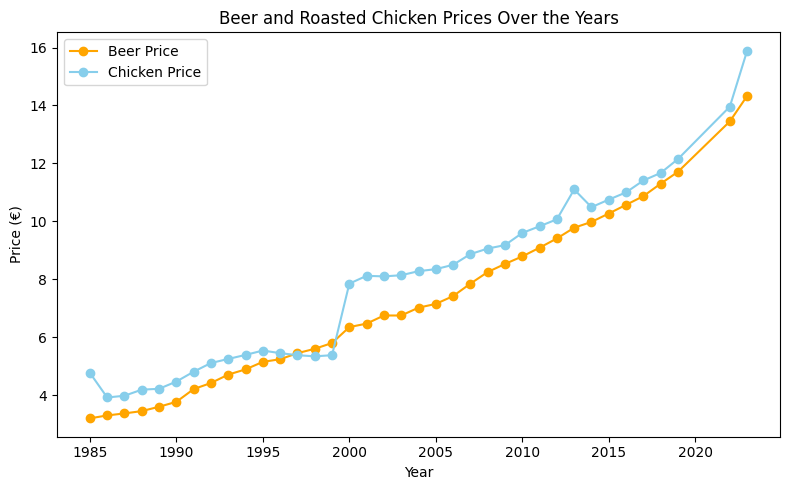

In [3]:
#2-1 Plot Beer and Roasted Chicken Prices Over Time
plt.figure(figsize=(8, 5))

plt.plot(df["jahr"], df["bier_preis"], marker="o", label="Beer Price", color="orange")
plt.plot(df["jahr"], df["hendl_preis"], marker="o", label="Chicken Price", color="skyblue")

# Labeling
plt.title("Beer and Roasted Chicken Prices Over the Years")
plt.xlabel("Year")
plt.ylabel("Price (€)")
plt.legend() #line corresponds to which price #the label sits at the up-left corner

plt.tight_layout()
plt.show()

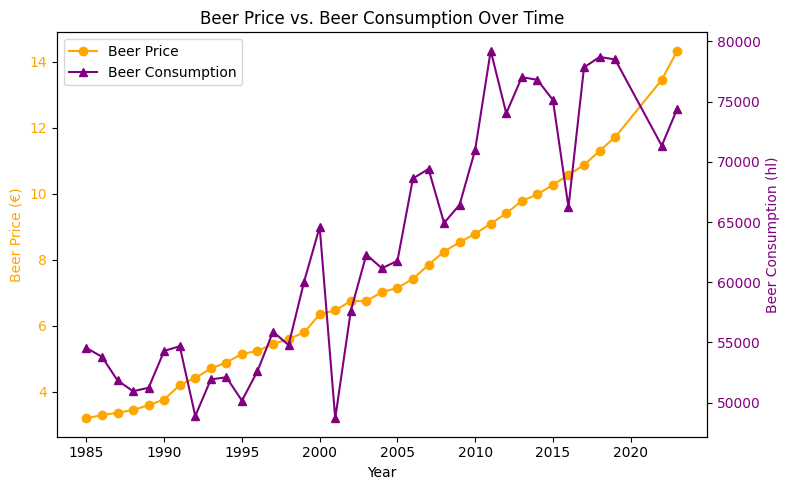

In [4]:
#2-2-1. Create the figure and the main axis (ax1)
fig, ax1 = plt.subplots(figsize=(8,5))

#2-2-2. Plot the first variable (Beer Price) on ax1
ax1.set_xlabel("Year")
ax1.set_ylabel("Beer Price (€)", color="orange")
line1 = ax1.plot(df["jahr"], df["bier_preis"], color="orange", marker="o", label="Beer Price")

# Make the y-ticks (and corresponding labels) match the line color
ax1.tick_params(axis="y", labelcolor="orange")

###2-2-3. Create a twin of ax1 (secondary y-axis) for Beer Consumption
ax2 = ax1.twinx() #generate a second axes that shares the same x-axis but has its own y-axis on the right side.
ax2.set_ylabel("Beer Consumption (hl)", color="purple")
line2 = ax2.plot(df["jahr"], df["bier_konsum"], color="purple", marker="^", label="Beer Consumption")

# Match tick label color
ax2.tick_params(axis="y", labelcolor="purple")

#2-2-4. Construct a combined legend from both lines
lines = line1 + line2
labels = [ln.get_label() for ln in lines]
plt.legend(lines, labels, loc="upper left")

#2-2-5. Adjust layout so nothing overlaps
plt.title("Beer Price vs. Beer Consumption Over Time")
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Relationship Between Beer Price, Visitors, and Beer Consumption
**Create a Bubble Chart**  
- Generate a **scatter plot** with:  
  - **Total visitors (in millions) on the X-axis**  
  - **Beer price (in €) on the Y-axis**  
- Each point should **represent a year**, so color-code the points by year (`hue` parameter).

**Represent Beer Consumption with Bubble Size**  
- The **bubble size should reflect beer consumption** (larger bubbles for higher beer consumption).  
- Adjust the scaling so that differences in consumption are clearly visible but not overwhelming.

**Final Touches**  
- Use **circular markers (`marker="o"`)** to ensure a clean and readable plot.  
- Label both axes properly and add a **title**.  
- Include a **legend** that differentiates the years.
- Apply **aesthetic improvements**, such as adjusting transparency (`alpha`) and adding gridlines for readability.


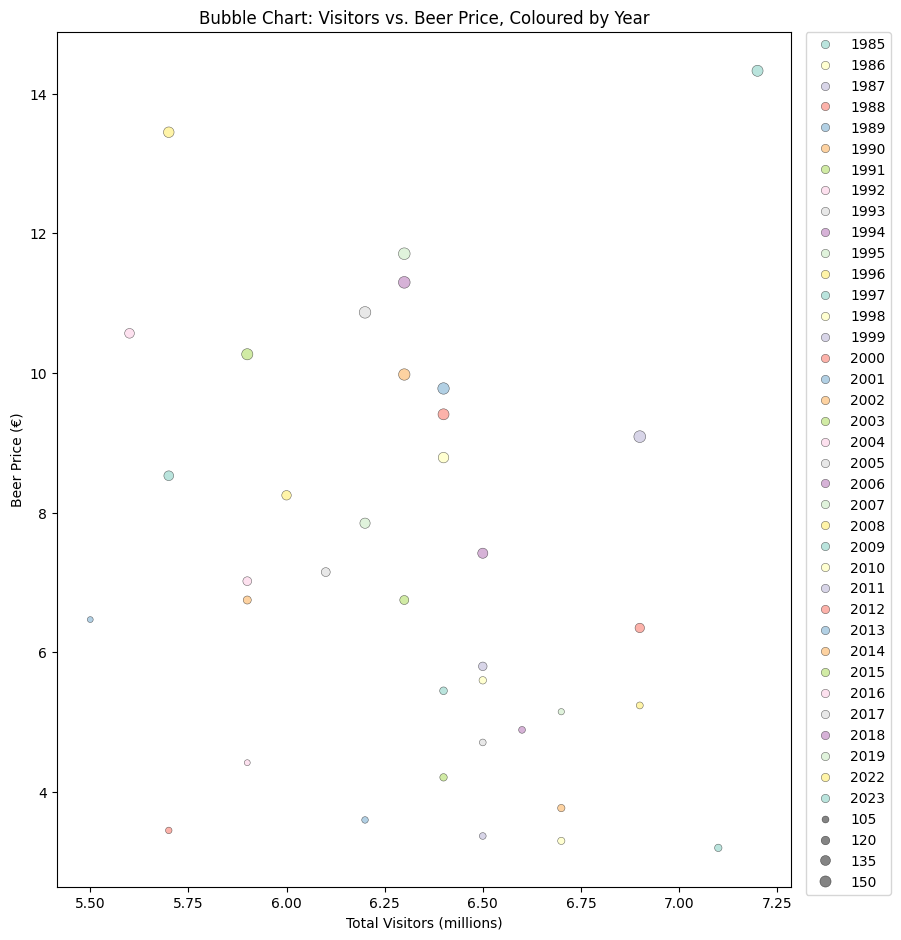

<Figure size 640x480 with 0 Axes>

In [6]:
#Bubble Chart = a scatter plot that uses marker size (or area) to represent a 3rd quantitative dimension


#We'll scale bubble size to keep them visible (e.g. multiply by 150 but in this case, the data points are too many so 0.002)
df["bier_konsum"] = pd.to_numeric(df["bier_konsum"], errors="coerce")
bubble_size = (df["bier_konsum"] * 0.002).to_numpy()

plt.figure(figsize=(10, 10)) #the size have to be adjusted to eliminate the left-side overlap

#Make the scatter plot
#alpha=0.6 adds some transparency, edgecolors=... draws borders
sns.scatterplot(
    data=df,
    x = df["besucher_gesamt"],
    y = df["bier_preis"],
    hue="jahr",
    size = bubble_size, # s sets the marker (bubble) size
    palette="Set3",
    alpha=0.6,
    edgecolors="black"
)

# Label axes, add title
plt.xlabel("Total Visitors (millions)")
plt.ylabel("Beer Price (€)")
plt.title("Bubble Chart: Visitors vs. Beer Price, Coloured by Year")

# Move legend outside and ensure enough space
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

# Tighten up spacing and push content away from the left
plt.tight_layout()
plt.subplots_adjust(left=0.15)
plt.figure(constrained_layout=True)
plt.show()